# TelCo Churn Analysis

## Introduction

TelCo is a company that offers telecommunications services (e.g. telephone, internet, television) to consumers in exchange for a subscription fee. They have provided us with a dataset concerning their customers, and they would like to know which customers are likely to **churn** (i.e. cancel their subscription) and which attributes affect a customer's likelihood to churn. If TelCo can predict which customers are going to cancel their subscription, measures can be taken to persuade the customers to stay. They could send promotional emails, offer a discount, or provide extra services. After all, retaining a customer is cheaper than attaining a new one. 

To attain our goal, we will first explore the dataset using Exploratory Data Analysis, after which we can build a model that can predict which customers will churn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_copy = df

## Exploratory Data Analysis

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

In [5]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

First, we will create a barchart for all categorical features that show the distribution per class (non-churn or churn).

In [6]:
axis_y = "percentage of customers"

#Grouped by partner
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

#Grouped on dependents
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

#Grouped multiple lines per customer by churn rate
gp_mpl = df.groupby('MultipleLines')["Churn"].value_counts()/len(df)
gp_mpl = gp_mpl.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

#Grouped internet services per customer by churn rate
gp_is = df.groupby('InternetService')["Churn"].value_counts()/len(df)
gp_is = gp_is.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

#Grouped online backup per customer by churn rate
gp_ob = df.groupby('OnlineBackup')["Churn"].value_counts()/len(df)
gp_ob = gp_ob.to_frame().rename({"Churn":axis_y}, axis=1).reset_index()

#Grouped device protection per customer by churn rate
gp_dp = df.groupby('DeviceProtection')["Churn"].value_counts()/len(df)
gp_dp = gp_dp.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

#Grouped tech support per customer by churn rate
gp_ts = df.groupby('TechSupport')["Churn"].value_counts()/len(df)
gp_ts = gp_ts.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

#Grouped streaming TV per customer by churn rate
gp_st = df.groupby('StreamingTV')["Churn"].value_counts()/len(df)
gp_st = gp_st.to_frame().rename({"Churn":axis_y}, axis=1).reset_index()        
                                    
#Grouped streaming movies per customer by churn rate
gp_sm = df.groupby('StreamingMovies')["Churn"].value_counts()/len(df)
gp_sm = gp_sm.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

#Grouped contract per customer by churn rate
gp_con = df.groupby('Contract')["Churn"].value_counts()/len(df)
gp_con = gp_con.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

#Grouped paperless billing per customer by churn rate
gp_pb = df.groupby('PaperlessBilling')["Churn"].value_counts()/len(df)
gp_pb = gp_pb.to_frame().rename({"Churn":axis_y}, axis=1).reset_index()   

#Grouped payment method per customer by churn rate
gp_pm = df.groupby('PaymentMethod')["Churn"].value_counts()/len(df)
gp_pm = gp_pm.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()

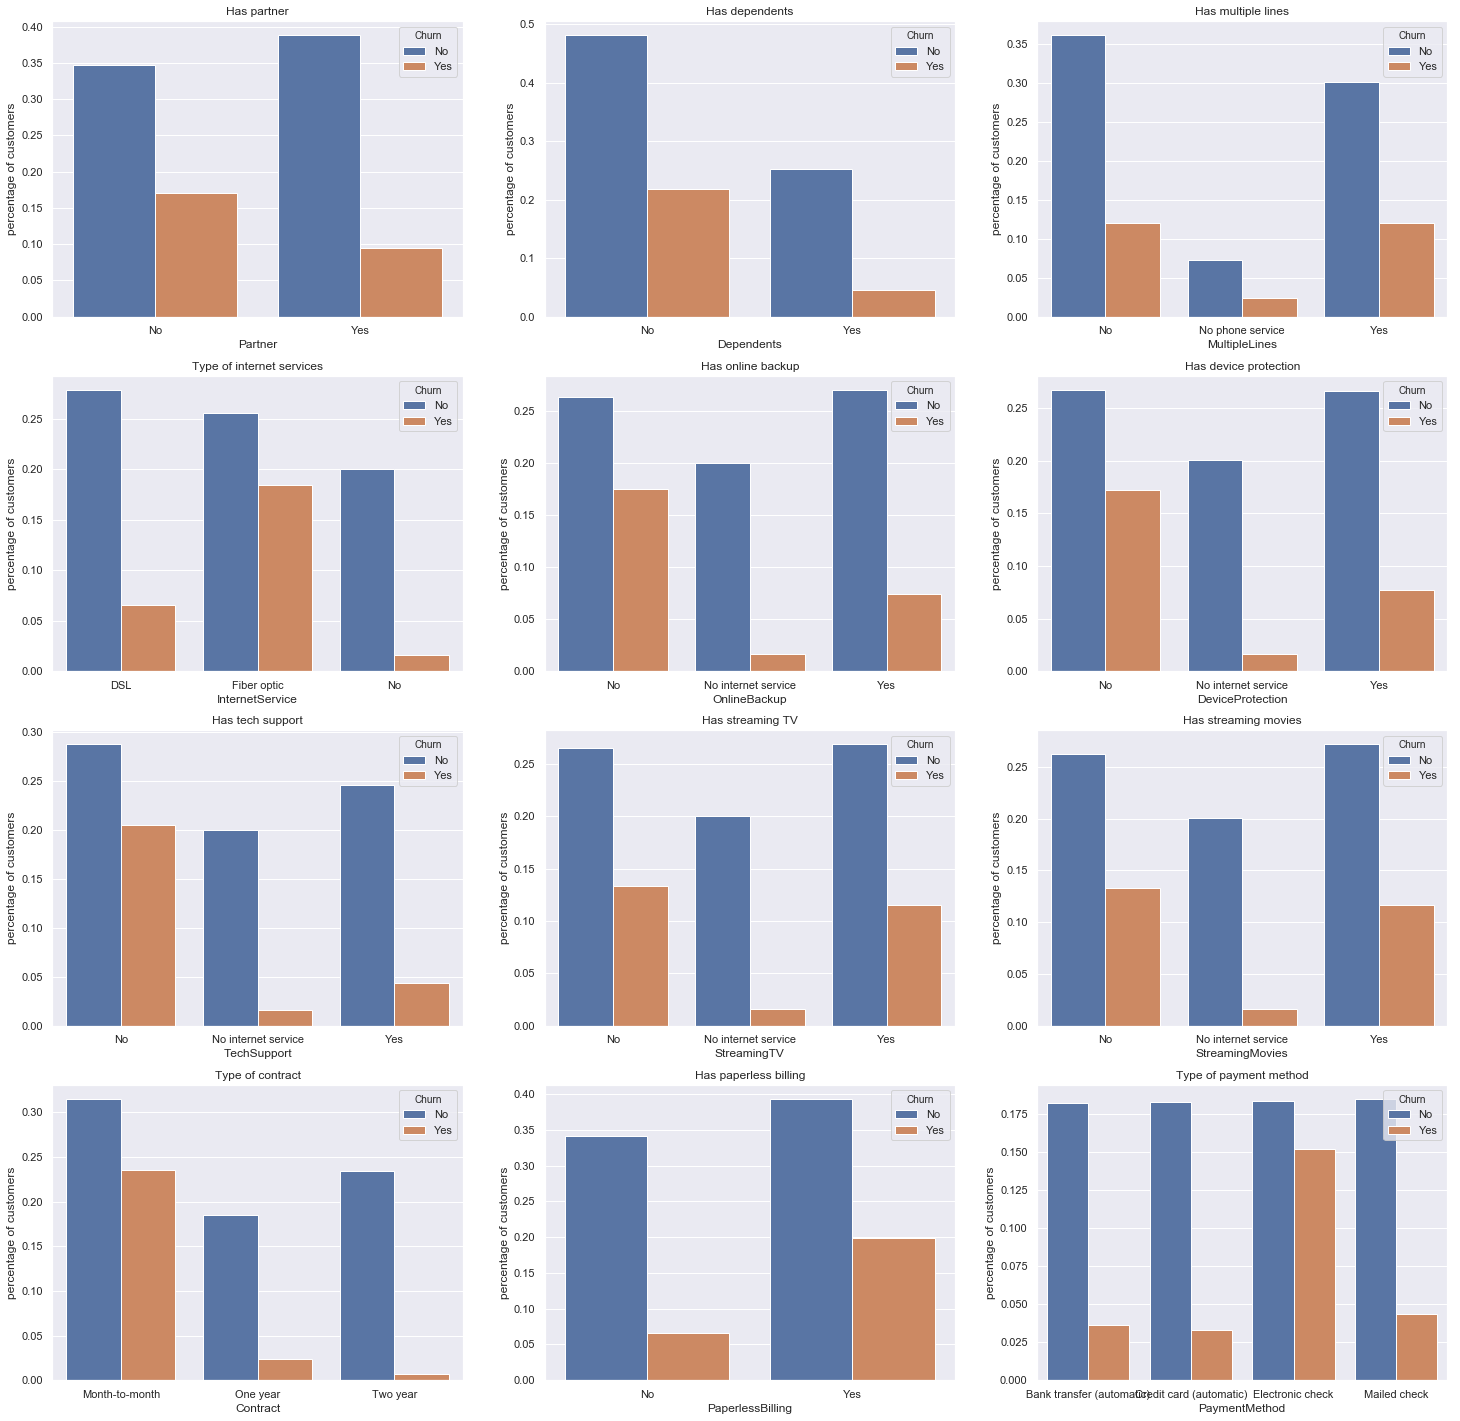

In [7]:
fig, axis = plt.subplots(4,3, figsize=(25,25))
axis[0,0].set_title("Has partner")
axis[0,1].set_title("Has dependents")
axis[0,2].set_title("Has multiple lines")
axis[1,0].set_title("Type of internet services")
axis[1,1].set_title("Has online backup")
axis[1,2].set_title("Has device protection")
axis[2,0].set_title("Has tech support")
axis[2,1].set_title("Has streaming TV")
axis[2,2].set_title("Has streaming movies")
axis[3,0].set_title("Type of contract")
axis[3,1].set_title("Has paperless billing")
axis[3,2].set_title("Type of payment method")

ax = sns.barplot(x='Partner', y=axis_y, hue='Churn', data=gp_partner, ax=axis[0,0])
ax = sns.barplot(x='Dependents', y=axis_y, hue='Churn', data=gp_dep, ax=axis[0,1])
ax = sns.barplot(x='MultipleLines', y=axis_y, hue='Churn', data=gp_mpl, ax=axis[0,2])
ax = sns.barplot(x='InternetService', y=axis_y, hue='Churn', data=gp_is, ax=axis[1,0])
ax = sns.barplot(x='OnlineBackup', y=axis_y, hue='Churn', data=gp_ob, ax=axis[1,1])
ax = sns.barplot(x='DeviceProtection', y=axis_y, hue='Churn', data=gp_dp, ax=axis[1,2])
ax = sns.barplot(x='TechSupport', y=axis_y, hue='Churn', data=gp_ts, ax=axis[2,0])
ax = sns.barplot(x='StreamingTV', y=axis_y, hue='Churn', data=gp_st, ax=axis[2,1])
ax = sns.barplot(x='StreamingMovies', y=axis_y, hue='Churn', data=gp_sm, ax=axis[2,2])
ax = sns.barplot(x='Contract', y=axis_y, hue='Churn', data=gp_con, ax=axis[3,0])
ax = sns.barplot(x='PaperlessBilling', y=axis_y, hue='Churn', data=gp_pb, ax=axis[3,1])
ax = sns.barplot(x='PaymentMethod', y=axis_y, hue='Churn', data=gp_pm, ax=axis[3,2])

Next, we have donut charts showing the distibution of gender (Male/Female) and the distribution of our classes (Non-Churn/Churn). Sadly, there are more non-churners than churners. This means that our dataset is unbalanced, which needs to be handled before we can build our models.

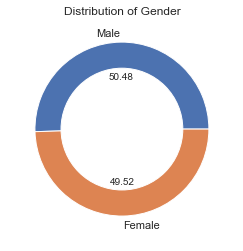

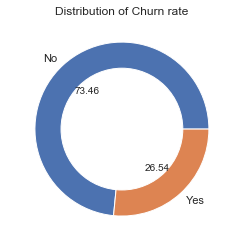

In [8]:
plt.figure(1)

plt.pie(x=df['gender'].value_counts().values, labels=df['gender'].value_counts().index, autopct='%1.2f', data=df)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Gender')

plt.figure(2)
plt.pie(x=df['Churn'].value_counts().values, labels=df['Churn'].value_counts().index, autopct='%1.2f', data=df)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Churn rate')

plt.show()

We will also show the distribution of the tenure feature (the duration of a customers subscription in months) per class. This graph shows that there are more customers that churn early in comparison to intermediate months. There are also many customers that have 72 months of tenure. This might mean that there are actually customers that have a longer tenure than 72 months, but that 72 months is chosen to be a cutoff point. What is certain, however, is that the churn rate diminishes for customers with longer tenure. 

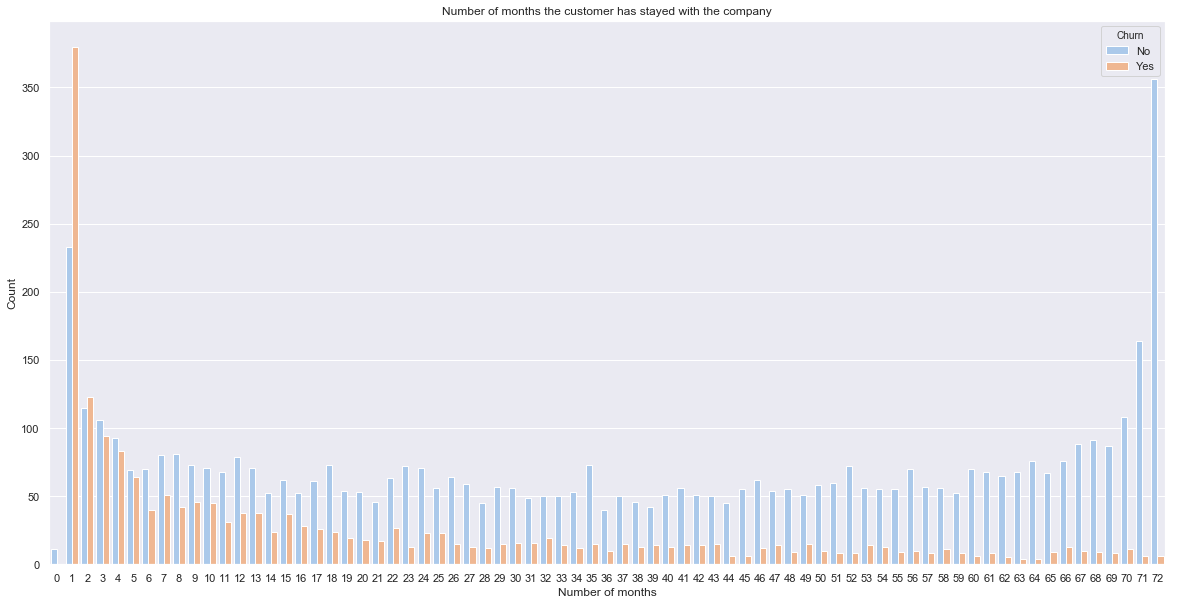

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x='tenure', hue='Churn', data=df, palette='pastel')

plt.title("Number of months the customer has stayed with the company")
plt.xlabel('Number of months')
plt.ylabel('Count');

Finally, we will show a density plot for the continuous variables ('Monthly Charges', 'Total Charges', and 'Tenure') per class. These density plots show that customers with higher montly charges are more likely to churn, while churn is rather independent of total charges. This can be explained by the fact that customers with large total charges are by definition a customer for longer, while having large monthly charges is independent of tenure. The 'Tenure' distribution again shows that customers that churn are likely to churn early. 

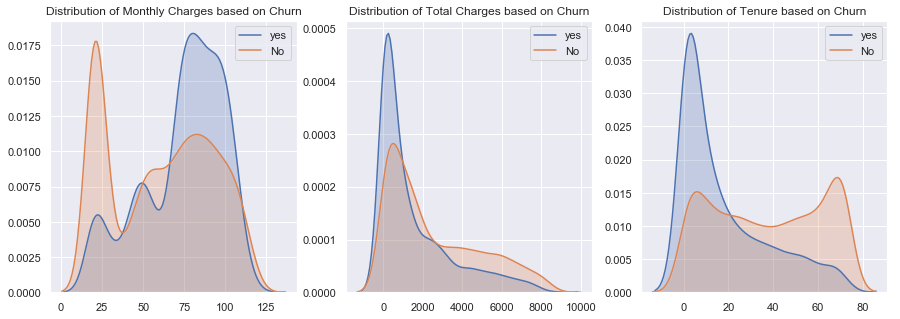

In [10]:
fig, axis = plt.subplots(1,3, figsize=(15,5))
axis[0].set_title("Distribution of Monthly Charges based on Churn")
axis[1].set_title("Distribution of Total Charges based on Churn")
axis[2].set_title("Distribution of Tenure based on Churn")

sns.kdeplot(df.MonthlyCharges[df.Churn=='Yes'], label='yes', shade=True, ax=axis[0])
sns.kdeplot(df.MonthlyCharges[df.Churn=='No'], label='No', shade=True, ax=axis[0])

sns.kdeplot(df.TotalCharges[df.Churn=='Yes'], label='yes', shade=True, ax=axis[1])
sns.kdeplot(df.TotalCharges[df.Churn=='No'], label='No', shade=True, ax=axis[1])

sns.kdeplot(df.tenure[df.Churn=='Yes'], label='yes', shade=True, ax=axis[2])
sns.kdeplot(df.tenure[df.Churn=='No'], label='No', shade=True, ax=axis[2])

## Data Manipulation & Feature Extraction

Before we can train our models, we need to manipulate/transform our data, and to extract relevant features. For one thing, it is necessary that the features inserted in our model are numerical. So we need to convert our categorical features (that contain text) to numerical features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
19.9        8
45.3        7
19.55       7
19.45       6
20.25       6
20.15       6
20.3        5
20.45       5
19.3        4
69.65       4
19.4        4
19.95       4
19.2        4
50.15       4
19.5        4
75.3        4
69.6        4
69.9        4
20.5        4
20.4        4
70.6        4
49.9        4
20.35       4
19.85       4
74.7        4
           ..
5685.8      1
4730.9      1
1806.35     1
4707.1      1
2224.5      1
2198.9      1
5023        1
3320.75     1
1287.85     1
2094.9      1
344.2       1
8308.9      1
540.95      1
332.5       1
4664.2      1
4549.45     1
1678.05     1
2867.75     1
4174.35     1
2390.45     1
6405        1
1189.4      1
1756.2      1
6891.45     1
2184.6      1
813.45      1
4554.85     1
4863.85     1
1306.3      1
161.95      1
Name: TotalCharges, Length: 6531, dtype: int64

Transform the categorical gender column to a numerical category (Female = 0, Male = 1).

In [6]:
gender_mapping = {'Female': 0, 'Male': 1}
df['gender'] = df['gender'].map(gender_mapping).astype(int)

Transform the variables that onlyl have 'No'/'Yes' values to a binary variable (No = 0, Yes = 1).

In [7]:
no_yes_mapping = {'No': 0, 'Yes': 1}
df['Partner'] = df['Partner'].map(no_yes_mapping).astype(int)
df['Dependents'] = df['Dependents'].map(no_yes_mapping).astype(int)
df['PhoneService'] = df['PhoneService'].map(no_yes_mapping).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].map(no_yes_mapping).astype(int)
df['Churn'] = df['Churn'].map(no_yes_mapping).astype(int)

There are also some variables with a category like 'No internet service' or 'No phone service'. This category is equivalent to not having the service, so transform these to a binary variable as well (No = 0, Yes = 1). 

In [8]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [9]:
no_yes_mapping = {'No': 0, 'No internet service': 0, 'No phone service': 0, 'Yes': 1}
df['MultipleLines'] = df['MultipleLines'].map(no_yes_mapping).astype(int)
df['OnlineSecurity'] = df['OnlineSecurity'].map(no_yes_mapping).astype(int)
df['OnlineBackup'] = df['OnlineBackup'].map(no_yes_mapping).astype(int)
df['DeviceProtection'] = df['DeviceProtection'].map(no_yes_mapping).astype(int)
df['TechSupport'] = df['TechSupport'].map(no_yes_mapping).astype(int)
df['StreamingTV'] = df['StreamingTV'].map(no_yes_mapping).astype(int)
df['StreamingMovies'] = df['StreamingMovies'].map(no_yes_mapping).astype(int)

The 'TotalCharges' column has some invalid rows. Convert the 'TotalCharges' column from 'Object' dtype to a 'float' dtype. Enter 0 in the rows with NaN/incorrect values.

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df['TotalCharges'].fillna(0, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int32
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int32
Dependents          7043 non-null int32
tenure              7043 non-null int64
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null object
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int32
dtypes: float64(2), int32(13), int64(2), obje

The remaining categorical variables have to be transformed into dummy variables. 

In [13]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [14]:
df = pd.concat([df, pd.get_dummies(df['InternetService'], prefix='InternetService')], axis=1)
df.drop('InternetService', axis=1, inplace=True)
df.rename(columns={'InternetService_Fiber optic': 'InternetService_Fiber'}, inplace=True)

In [15]:
df = pd.concat([df, pd.get_dummies(df['Contract'], prefix='Contract')], axis=1)
df.drop('Contract', axis=1, inplace=True)
df.rename(columns={'Contract_Month-to-month': 'Contract_Monthly',
                   'Contract_One year': 'Contract_1Year',
                   'Contract_Two year': 'Contract_2Year'}, inplace=True)

In [16]:
df = pd.concat([df, pd.get_dummies(df['PaymentMethod'], prefix='Payment')], axis=1)
df.drop('PaymentMethod', axis=1, inplace=True)
df.rename(columns={'Payment_Bank transfer (automatic)': 'Payment_Bank',
                   'Payment_Credit card (automatic)': 'Payment_Creditcard',
                   'Payment_Electronic check': 'Payment_ElectronicCheck',
                   'Payment_Mailed check': 'Payment_MailedCheck'}, inplace=True)

Drop the customerID column, since it won't be needed for further analysis.

In [17]:
df.drop('customerID', axis=1, inplace=True)

## Correlation Matrices

Change the order of the columns of our dataframe, so the churn variable is presented first.

In [18]:
df = df[['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber', 'InternetService_No',
       'Contract_Monthly', 'Contract_1Year', 'Contract_2Year', 'Payment_Bank',
       'Payment_Creditcard', 'Payment_ElectronicCheck', 'Payment_MailedCheck']]

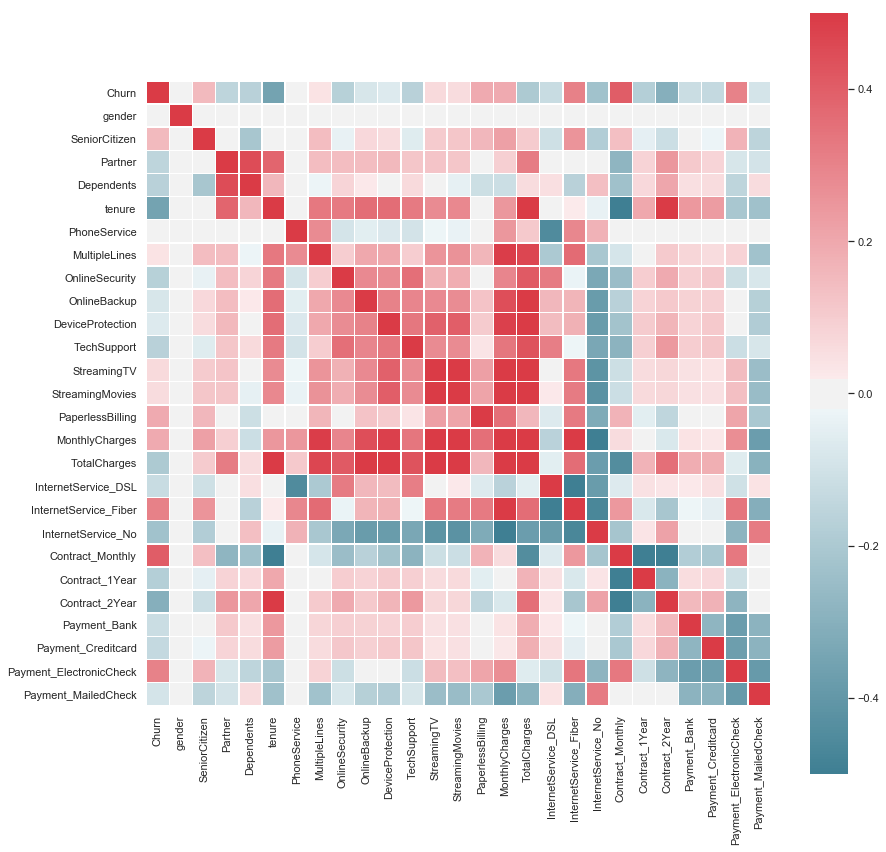

In [19]:
# Get a correlation DataFrame.
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-0.5, vmax=0.5, center=0,
            square=True, linewidths=.5);

Get a correlation DataFrame, sorted descending, and get only the 'Churn' column, since this is our dependent variable. As you can see, there are some features that have a positive correlation with 'Churn', like having a monthly contract, having higher charges, and having more services. Other features are negatively correlated with 'Churn', like a customer's tenure and having longer-term contracts. These will probably be important features for training our model.

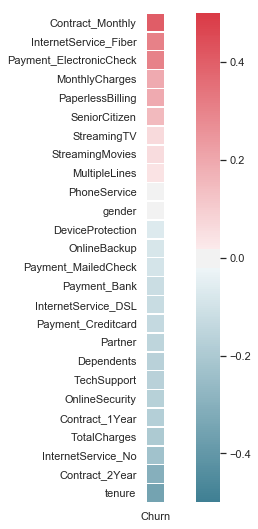

In [20]:
corr = df.corr()
corr = corr[['Churn']]
corr.sort_values(by='Churn', ascending=False, inplace=True)
corr = corr.iloc[1:]

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-0.5, vmax=0.5, center=0,
            square=True, linewidths=.5);

## Data Preparation

Split the dependent variable (y) from the independent variables (X).

In [21]:
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber', 'InternetService_No',
       'Contract_Monthly', 'Contract_1Year', 'Contract_2Year', 'Payment_Bank',
       'Payment_Creditcard', 'Payment_ElectronicCheck', 'Payment_MailedCheck']]
y = df['Churn']

Some of our variables are on different scales (the categorical variables between 0 and 1, while 'MonthlyCharges' and 'TotalCharges' are between 0 and 9000). A MinMaxScaler will be applied to our independent variables to convert the values to be within 0 and 1, so that all the variables will receive the same weight when training our models.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns = X.columns
X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns=columns)

C:\Users\niekl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Since our dataset is unbalanced (more non-churners than churners (75% and 25%, respectively)), we need to apply an oversampling technique called SMOTE (Synthetic Minority Over-sampling Technique) that will oversample rows from the minority class, making it a balanced dataset. 

In [23]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 0)
X, y = os.fit_sample(X, y)
X = pd.DataFrame(data = X, columns=columns)
y = pd.Series(data = y)

## Logistic Regression

We will try to fit a first logistic regression to the dataset. We use cross-validation to test how well our models perform on unseen data. 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score
reg = LogisticRegression(C=2, solver='liblinear')
reg.fit(X, y)
print("Logistic Regression:\n")
y_test_predict = cross_val_predict(reg, X, y, cv=10)
print("The accuracy score for the test set is:     ", cross_val_score(reg, X, y, cv=10).mean())

Logistic Regression:

The accuracy score for the test set is:      0.7754223206350866


The coefficients of our logistic regression model are as follows: 

In [25]:
print('{:30s}{:10s}\n'.format('Feature', 'Coefficient'))
print('{:30s}{:5.3f}'.format('Intercept', reg.intercept_[0]))
for i, feature in enumerate(reg.coef_[0]):
    print('{:30s}{:5.3f}'.format(X.columns[i], feature))

Feature                       Coefficient

Intercept                     0.298
gender                        -0.004
SeniorCitizen                 0.083
Partner                       0.056
Dependents                    -0.293
tenure                        -4.584
PhoneService                  -0.550
MultipleLines                 0.286
OnlineSecurity                -0.502
OnlineBackup                  -0.145
DeviceProtection              -0.061
TechSupport                   -0.346
StreamingTV                   0.236
StreamingMovies               0.257
PaperlessBilling              0.367
MonthlyCharges                -0.498
TotalCharges                  3.144
InternetService_DSL           0.113
InternetService_Fiber         0.941
InternetService_No            -0.756
Contract_Monthly              0.811
Contract_1Year                0.131
Contract_2Year                -0.644
Payment_Bank                  0.036
Payment_Creditcard            -0.012
Payment_ElectronicCheck       0.326
Payment_M

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y, y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      5174
           1       0.75      0.82      0.78      5174

   micro avg       0.78      0.78      0.78     10348
   macro avg       0.78      0.78      0.78     10348
weighted avg       0.78      0.78      0.78     10348



For all our models, we will analyze their **recall** (% of the actual churners that the model correctly predicts), **precision** (% of the predicted churners that are correct) and **accuracy** (% of the predictions that are correct). These metrics will be used to compare the models. We will also compare the training accuracy score with the test accuracy score to determine how well the model performs on unseen data.

In [27]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
model_scores = pd.DataFrame(columns=['Model', 'Recall', 'Precision', 'Accuracy'])
model_scores.loc[0] = ['Logistic Regression',
                       recall_score(y, y_test_predict),
                       precision_score(y, y_test_predict),
                       accuracy_score(y, y_test_predict)]

In [28]:
bias_variance = pd.DataFrame(columns=['Model', 'Training Score', 'Test Score'])
scores = cross_validate(reg, X, y, cv=10)
bias_variance.loc[0] = 'Logistic Regression', scores['test_score'].mean(), scores['train_score'].mean()

C:\Users\niekl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [29]:
model_scores

,Model,Recall,Precision,Accuracy
0,Logistic Regression,0.817549,0.754011,0.775416


Also, for all models we will create a **Receiver Operating Characteristic (ROC)**, which shows the relationship between the **True Positive Rate** and the **False Positive Rate** at various threshold settings. It tells you how well the model is capable to distinguish between classes, in our case non-churners and churners. A better model has a higher **Area under the curve (AUC)**.

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve, scorer, auc
probabilities = reg.predict_proba(X)
fpr_reg, tpr_reg, thresholds = roc_curve(y, probabilities[:,1])
reg_auc = auc(fpr_reg, tpr_reg)
print("Area under curve: ", reg_auc)

Area under curve:  0.8568965631882165


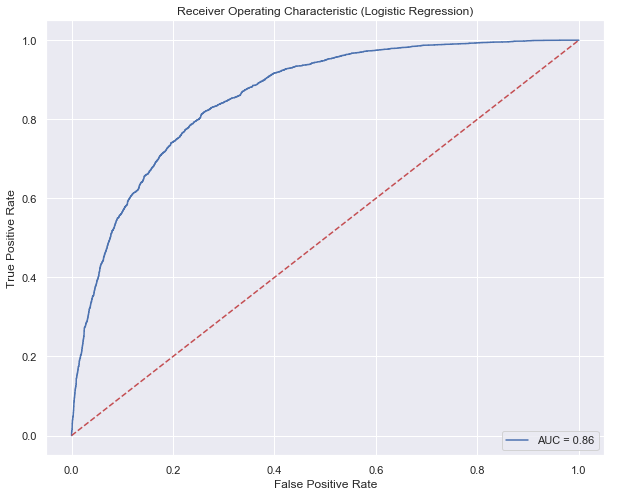

In [31]:
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.plot(fpr_reg, tpr_reg, 'b', label = 'AUC = %0.2f' % reg_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We will now plot the coefficients in a sorted bar-chart to get a better overview. It is clear that **tenure** negatively affects churn and that **TotalCharges** has a positive effect on churn.

In [32]:
coefficients  = pd.DataFrame(reg.coef_.ravel())
column_df     = pd.DataFrame(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                              'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                              'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
                              'InternetService_DSL', 'InternetService_Fiber', 'InternetService_No',
                              'Contract_Monthly', 'Contract_1Year', 'Contract_2Year', 'Payment_Bank',
                              'Payment_Creditcard', 'Payment_ElectronicCheck', 'Payment_MailedCheck'])
coef_sumry    = (pd.merge(coefficients, column_df, left_index=True,
                              right_index=True, how="left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by="coefficients", ascending=False)

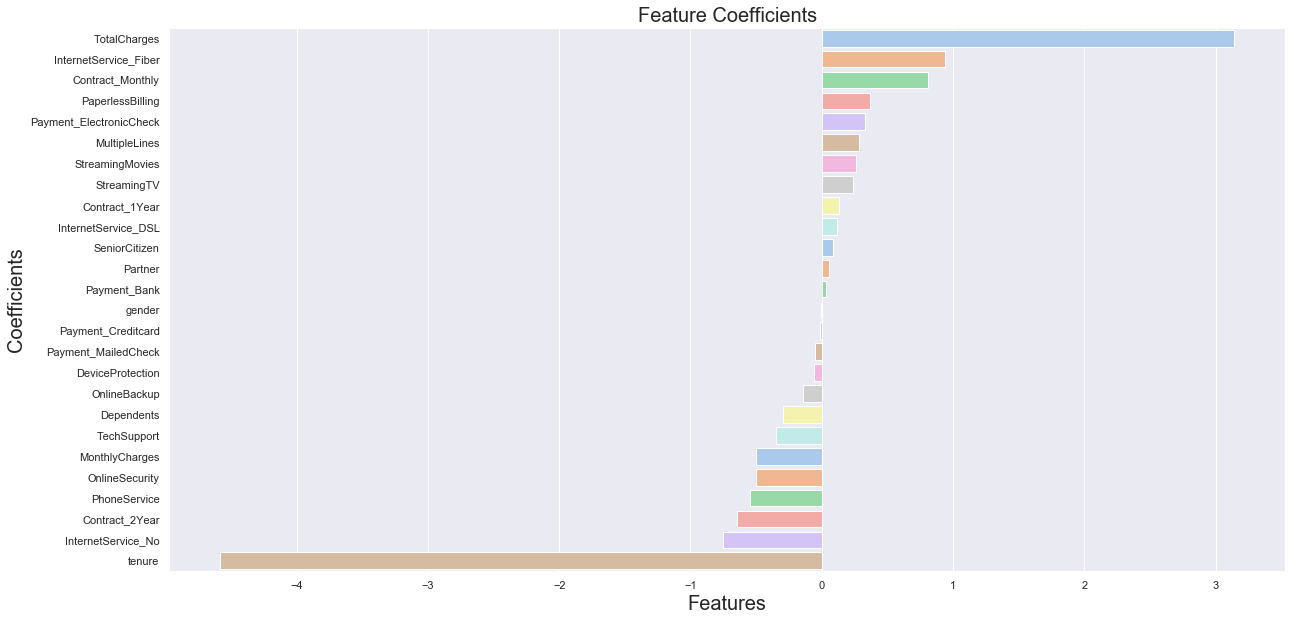

In [33]:
plt.figure(figsize=(20, 10))
sns.barplot(data=coef_sumry, x='coefficients', y='features', palette='pastel')
plt.xlabel(xlabel='Features', fontsize=20)
plt.ylabel(ylabel='Coefficients', fontsize=20)
plt.title(label='Feature Coefficients', fontsize=20)
plt.xticks(rotation=0);

Last but not least, we will provide a confusion matrix to determine the amount of True Negatives (TN), False Posivites (FP), False Negatives (FN) and True Posivites (TP). The red blocks are the instances that the model has correctly predicted (either the non-churners or the churners), and are fortunately much bigger than the incorrect predictions (the blue blocks).

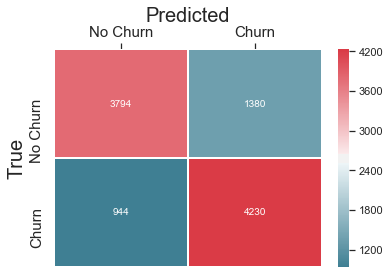

In [34]:
from sklearn.metrics import confusion_matrix
cfn_matrix = confusion_matrix(y, y_test_predict)

# Plot confusion matrix in a beautiful manner
ax = plt.subplot()
sns.heatmap(cfn_matrix, annot=True, fmt='g', ax = ax, cmap=cmap, linewidths=1); 

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['No Churn', 'Churn'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['No Churn', 'Churn'], fontsize = 15)
plt.show()

## Random Forest

We will now do the same, but with a **Random Forest**:

In [35]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=350, max_features='auto', max_depth=5, criterion='gini',
                             min_samples_leaf=3, min_samples_split=12)
RFC.fit(X, y)
y_test_predict = cross_val_predict(RFC, X, y, cv=10)
print("Random Forest Classifier:\n")
print("The accuracy score for the test set is:     ", cross_val_score(RFC, X, y, cv=10).mean())

Random Forest Classifier:

The accuracy score for the test set is:      0.7859616662808151


In [36]:
print(classification_report(y, y_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      5174
           1       0.75      0.84      0.80      5174

   micro avg       0.78      0.78      0.78     10348
   macro avg       0.79      0.78      0.78     10348
weighted avg       0.79      0.78      0.78     10348



In [37]:
model_scores.loc[1] = ['Random Forest',
                       recall_score(y, y_test_predict),
                       precision_score(y, y_test_predict),
                       accuracy_score(y, y_test_predict)]

In [38]:
scores = cross_validate(RFC, X, y, cv=10)
bias_variance.loc[1] = 'Random Forest', scores['test_score'].mean(), scores['train_score'].mean()

C:\Users\niekl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Area under curve is:  0.8768306124299952


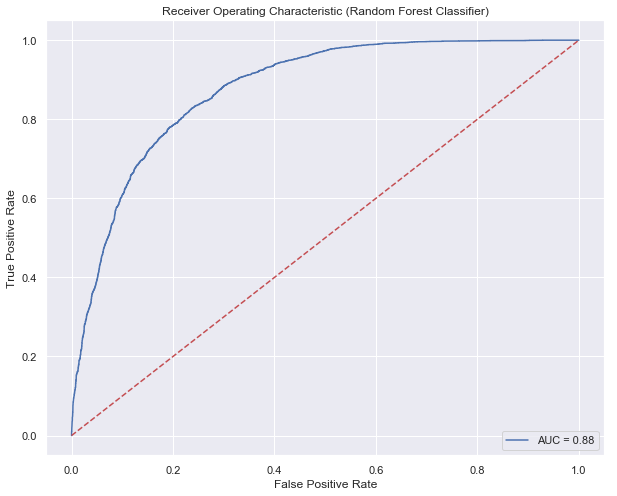

In [39]:
probabilities = RFC.predict_proba(X)
fpr_RFC, tpr_RFC, thresholds = roc_curve(y, probabilities[:,1])
RFC_auc = auc(fpr_RFC, tpr_RFC)
print("Area under curve is: ", RFC_auc)
# Plot the ROC curve of the Random Forest Classifier
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (Random Forest Classifier)')
plt.plot(fpr_RFC, tpr_RFC, 'b', label = 'AUC = %0.2f' % RFC_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

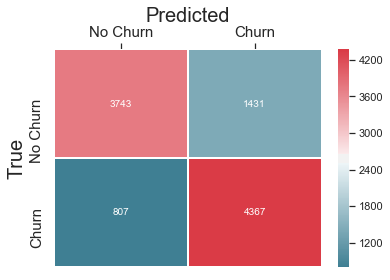

In [40]:
cfn_matrix = confusion_matrix(y, y_test_predict)

# Plot confusion matrix in a beautiful manner
ax = plt.subplot()
sns.heatmap(cfn_matrix, annot=True, fmt='g', ax = ax, cmap=cmap, linewidths=1); 

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['No Churn', 'Churn'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['No Churn', 'Churn'], fontsize = 15)
plt.show()

Instead of coefficients, a Random Forest has **Feature Importances** that demonstrate how important a feature was for building the decision trees. These weights say nothing about whether the features affect churn negatively or positively though.

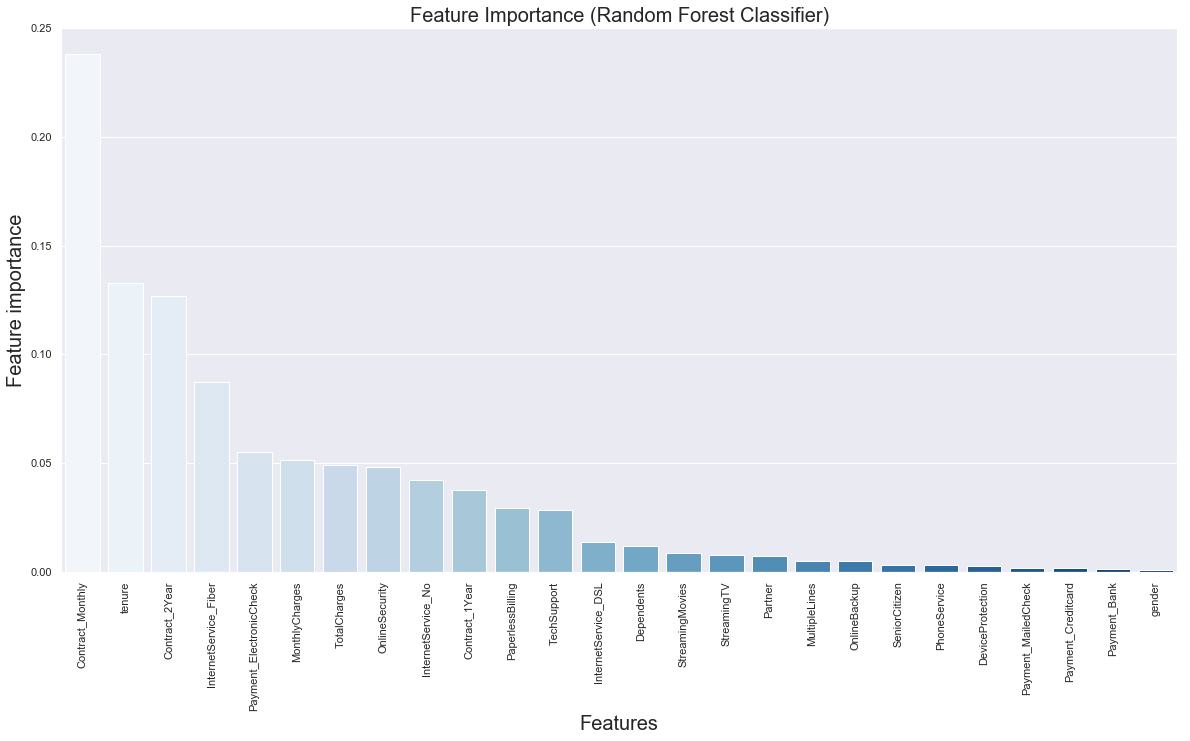

In [41]:
importances = pd.DataFrame(RFC.feature_importances_)
importances_df = (pd.merge(importances, column_df, left_index=True,
                              right_index=True, how="left"))
importances_df.columns = ["feature importance", "features"]
importances_df = importances_df.sort_values(by="feature importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(20, 10))
sns.barplot(data=importances_df, x='features', y='feature importance', palette='Blues')
plt.xlabel(xlabel='Features', fontsize=20)
plt.ylabel(ylabel='Feature importance', fontsize=20)
plt.title(label='Feature Importance (Random Forest Classifier)', fontsize=20)
plt.xticks(rotation=90);

## K-Nearest Neighbors

Last but not least, we will make a K-Nearest Neighbors classifier:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
y_test_predict = cross_val_predict(knn, X, y, cv=10)
print("K-Nearest Neighbors Classification (k=10): ")
print("Accuracy of the test data:", cross_val_score(knn, X, y, cv=10).mean())

K-Nearest Neighbors Classification (k=10): 
Accuracy of the test data: 0.7909876925834374


In [43]:
scores = cross_validate(knn, X, y, cv=10)
bias_variance.loc[2] = 'K-Nearest Neighbors', scores['test_score'].mean(), scores['train_score'].mean()

C:\Users\niekl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [44]:
print(classification_report(y, y_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      5174
           1       0.75      0.88      0.81      5174

   micro avg       0.79      0.79      0.79     10348
   macro avg       0.80      0.79      0.79     10348
weighted avg       0.80      0.79      0.79     10348



In [45]:
model_scores.loc[2] = ['K-Nearest Neighbors',
                       recall_score(y, y_test_predict),
                       precision_score(y, y_test_predict),
                       accuracy_score(y, y_test_predict)]

Area under the curve is :  0.9185473470650808


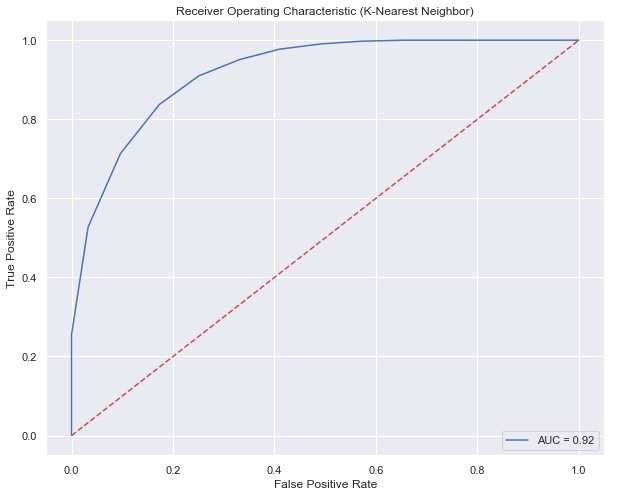

In [46]:
probabilities = knn.predict_proba(X)
fpr_knn, tpr_knn, thresholds = roc_curve(y, probabilities[:,1])
knn_auc = auc(fpr_knn, tpr_knn)
print("Area under the curve is : ", knn_auc)

# Plot the ROC curve of the K-Nearest Neighbors Classifier
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (K-Nearest Neighbor)')
plt.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.2f' % knn_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

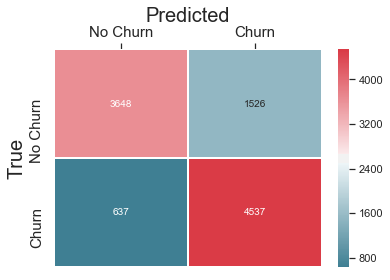

In [47]:
cfn_matrix = confusion_matrix(y, y_test_predict)

# Plot confusion matrix in a beautiful manner
ax = plt.subplot()
sns.heatmap(cfn_matrix, annot=True, fmt='g', ax = ax, cmap=cmap, linewidths=1); 

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['No Churn', 'Churn'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['No Churn', 'Churn'], fontsize = 15)
plt.show()

# Conclusion

K-Nearest Neighbors is the best-scoring model on the TelCo dataset. Although it has a smaller **Precision** than the other models, its **Recall** and **Accuracy** is significantly better, as well as having the highest **AUC (Area under the curve)**. In our opinion, TelCo should aim for a higher recall instead of precision, since it is better to incorrectly label a non-churner as a churner, than to incorrectly label a churner as a non-churner. Sending an email or a discount coupon is cheap, while losing a customer means losing its revenue. 

In [48]:
model_scores

,Model,Recall,Precision,Accuracy
0,Logistic Regression,0.817549,0.754011,0.775416
1,Random Forest,0.844028,0.753191,0.783726
2,K-Nearest Neighbors,0.876884,0.748309,0.790974


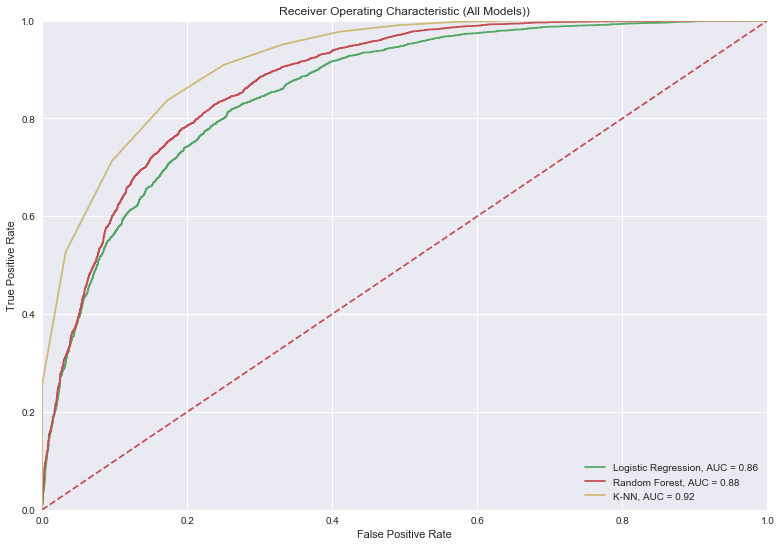

In [49]:
# Plot the ROC curve of all the models together
plt.style.use('seaborn')
plt.figure(figsize=(13, 9))
plt.title('Receiver Operating Characteristic (All Models))')
plt.plot(fpr_reg, tpr_reg, 'g', label = 'Logistic Regression, AUC = %0.2f' % reg_auc)
plt.plot(fpr_RFC, tpr_RFC, 'r', label = 'Random Forest, AUC = %0.2f' % RFC_auc)
plt.plot(fpr_knn, tpr_knn, 'y', label = 'K-NN, AUC = %0.2f' % knn_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Test2.png', dpi=300, bbox_inches='tight', pad_inches=0.3)

To check whether the models are overfit, here is an overview of the training and test accuracy of the models. The models are scoring better on the testing data, meaning the models are not overfit and are thus suited for predicting unseen data. 

In [50]:
bias_variance

,Model,Training Score,Test Score
0,Logistic Regression,0.775422,0.777445
1,Random Forest,0.785187,0.790534
2,K-Nearest Neighbors,0.790988,0.826655


## Extra: Survival Analysis

As an extra analysis, we will also employ survival analysis on our dataset. Survival analysis is used to calculate the expected duration of time until a specific event happens, in our case whether a customer is going to churn. So instead of predicting which customers are going to churn, with survival analysis we can predict when customers are going to churn.

First, for all our categorical dummy variables, we need to leave one category out (dummy encoding). The categories that are left out are: 'InternetService_No', 'Contract_Monthly', and 'Payment_Bank'. 

In [51]:
survival = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
               'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
               'InternetService_DSL', 'InternetService_Fiber', 'Contract_1Year', 'Contract_2Year',
               'Payment_Creditcard', 'Payment_ElectronicCheck', 'Payment_MailedCheck', 'Churn']]

In [52]:
X = survival[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
              'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
              'InternetService_DSL', 'InternetService_Fiber', 'Contract_1Year', 'Contract_2Year',
              'Payment_Creditcard', 'Payment_ElectronicCheck', 'Payment_MailedCheck']]
y = survival['Churn']

Then we need to split our dataset into a training set and a test set (80% and 20% respectively).

In [53]:
from sklearn.model_selection import train_test_split
cph_train, cph_test = train_test_split(df, test_size=0.2)

Now we will plot the Kaplan-Meier Survival Curve that estimates the survival rate of the entire sample (our dataset):

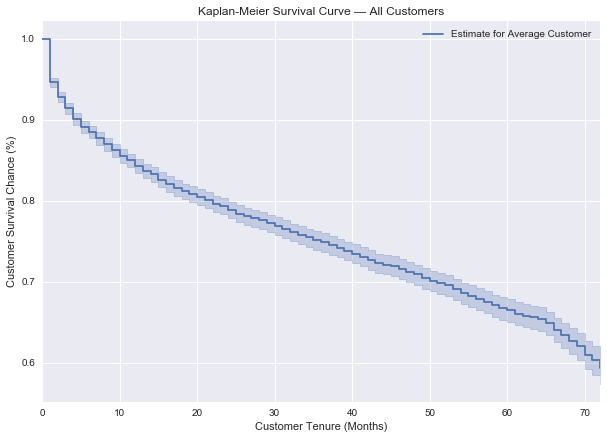

In [54]:
import lifelines

# Fitting kmf to churn data
tenure = survival['tenure'].values
churn = survival['Churn'].values
kmf = lifelines.KaplanMeierFitter()
kmf.fit(tenure, event_observed=churn, label='Estimate for Average Customer')

# Plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

Plot the Cox model:

In [55]:
cph = lifelines.CoxPHFitter()
cph.fit(survival, duration_col='tenure', event_col='Churn', show_progress=False)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 observations, 5174 censored>
      duration col = 'tenure'
         event col = 'Churn'
number of subjects = 7043
  number of events = 1869
    log-likelihood = -12659.69
  time fit was run = 2019-06-30 17:53:55 UTC

---
                         coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
gender                  -0.04      0.96      0.05  -0.85   0.40      1.33       -0.13        0.05
SeniorCitizen            0.03      1.04      0.06   0.61   0.54      0.88       -0.08        0.15
Partner                 -0.18      0.84      0.06  -3.23 <0.005      9.67       -0.29       -0.07
Dependents              -0.09      0.91      0.07  -1.31   0.19      2.40       -0.23        0.05
PhoneService             0.83      2.29      0.47   1.75   0.08      3.63       -0.10        1.76
MultipleLines            0.09      1.09      0.13   0.69   0.49      1.03       -0.16        0.33
OnlineSecurity          -0.21      0.81      0.13  -

Plot the coefficients including their confidence intervals:

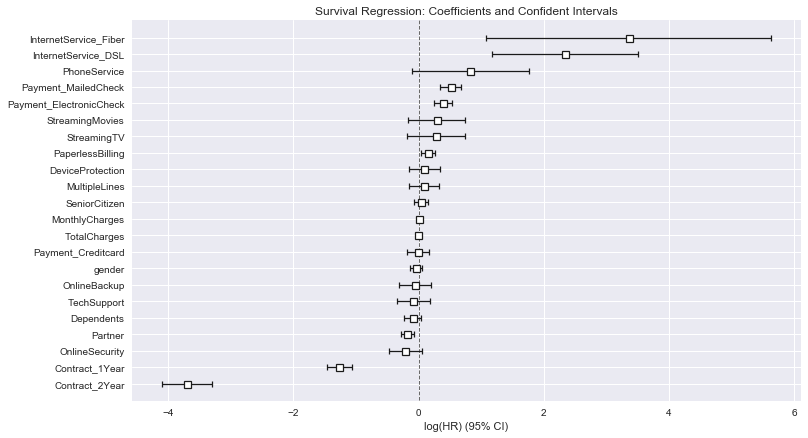

In [56]:
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);

We can also plot a Kaplan Meier Curve per feature:

In [57]:
# Function for creating Kaplan-Meier curve plots segmented by categorical variables
def plot_categorical_survival(feature, t='tenure', event='Churn', df=df_copy, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat)

First of all, we will make a Kaplan-Meier Curve for customers that have dependents (children or persons they care for) or no dependents. The figure shows that customers with dependents are less likely to churn:

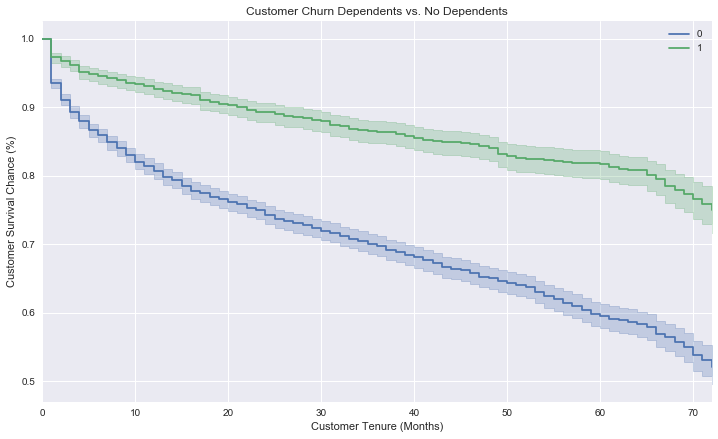

In [58]:
fig_dep, ax_dep = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='Dependents', ax=ax_dep)
ax_dep.set_title('Customer Churn Dependents vs. No Dependents')
ax_dep.set_xlabel('Customer Tenure (Months)')
ax_dep.set_ylabel('Customer Survival Chance (%)')
plt.show()

The same is true for customers that pay automatically, either by bank transfer or creditcard. Automatic payment make it easier for customers to cancel a subscription.

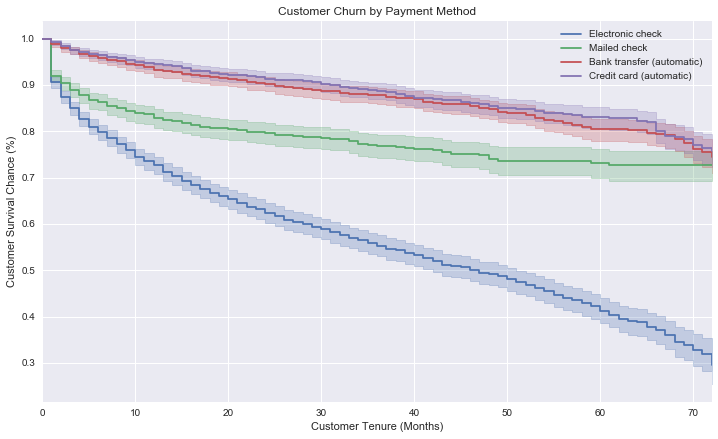

In [59]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='PaymentMethod', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by Payment Method')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Chance (%)')
plt.show()

Longer-term contracts also mean more loyal customers. Although this is not surprising, the effect of having a monthly contract is huge on churn. TelCo should really consider selling more 2-year contracts if they want to retain customers longer.

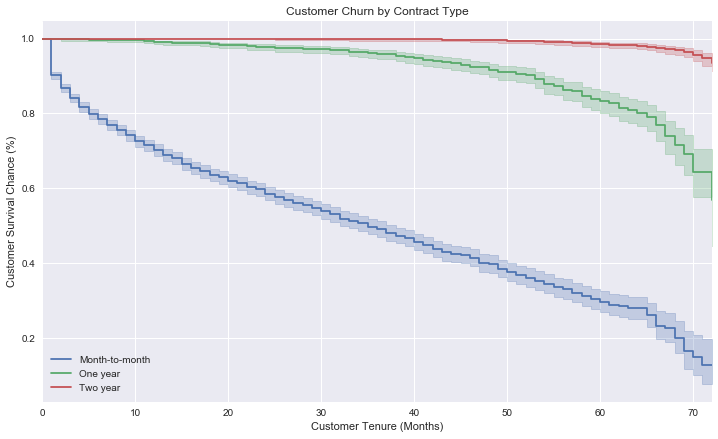

In [60]:
fig_contract, ax_contract = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='Contract', ax=ax_contract)
ax_contract.set_title('Customer Churn by Contract Type')
ax_contract.set_xlabel('Customer Tenure (Months)')
ax_contract.set_ylabel('Customer Survival Chance (%)')
plt.show()

## Individual survival estimates

Instead of looking at the whole sample or whole categories, survival analysis can also be applied to individual clients. We can estimate per customer its median survival time:

In [63]:
from lifelines.utils import median_survival_times, qth_survival_times
predictions_50 = median_survival_times(conditioned_sf)

In [66]:
values = predictions_50.T.join(survival[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure'])

In [67]:
values.rename_axis('Customer', axis=0, inplace=True)
values['Months Remaining'] = values[0.5] - values['tenure']
values.rename(columns={0.5: 'Median Survival Time',
                       'RemainingValue': 'Value Remaining'}, inplace=True)

In [68]:
values = values[['Median Survival Time', 'tenure', 'Months Remaining', 'MonthlyCharges', 'Value Remaining']]
values.columns = ['Expected Median Survival Time', 'Tenure', 'Expected Months Remaining', 'MonthlyCharges', 'Expected Value Remaining']

Now we get for each customer an expected median survival time (after which the customer is expected to have churned). If you subtract the customers tenure, you get the expected months remaining. Multiplying this with his monthly charges, gives you an expected remaining value of the customer. This can be used to prioritize between customers, or to predict the expected revenue for all customers.

In [69]:
values[:5]

,Expected Median Survival Time,Tenure,Expected Months Remaining,MonthlyCharges,Expected Value Remaining
Customer,,,,,
0,22.0,1,21.0,29.85,626.85
1,49.0,34,15.0,56.95,854.25
3,60.0,45,15.0,42.30,634.50
6,31.0,22,9.0,89.10,801.90
7,27.0,10,17.0,29.75,505.75


Now we need to check how well the survival model works:

Text(0.5, 1.0, 'Calibration plots  (Reliability curve)')

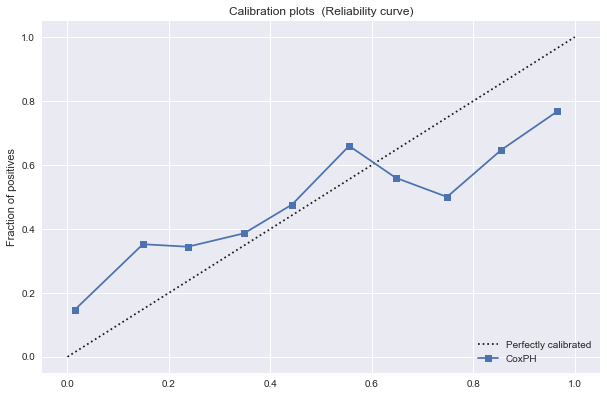

In [70]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

probs = 1 - np.array(cph.predict_survival_function(cph_test).loc[13])
actual = cph_test['Churn']

fraction_of_positives, mean_predicted_value = \
calibration_curve(actual, probs, n_bins=10, normalize=False)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
        label="%s" % ("CoxPH",))


ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (Reliability curve)')

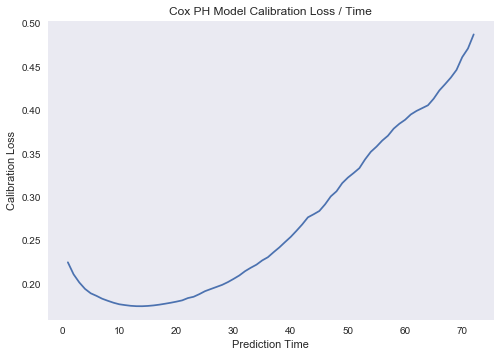

In [71]:
from sklearn.metrics import brier_score_loss

loss_dict = {}
for i in range(1,73):
    score = brier_score_loss(
        cph_test['Churn'], 1 - np.array(cph.predict_survival_function(cph_test).loc[i]), pos_label=1)
    loss_dict[i] = [score]

loss_df = pd.DataFrame(loss_dict).T

fig, ax = plt.subplots()
ax.plot(loss_df.index, loss_df)

ax.set(xlabel='Prediction Time', ylabel='Calibration Loss',
       title='Cox PH Model Calibration Loss / Time')
ax.grid()
plt.show()